<a href="https://colab.research.google.com/github/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/forouzanfallah/Fault-Tolerant-Control-Systems-TA-Class-Material.git

fatal: destination path 'Fault-Tolerant-Control-Systems-TA-Class-Material' already exists and is not an empty directory.


#Libraries

In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#DATA

upload the data in the colab or link to the google drive

In [ ]:
drive.mount('/content/gdrive')

In [22]:
data_train = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  train (20x960x52).xlsx",header=None)
data_test = pd.read_excel("/content/Fault-Tolerant-Control-Systems-TA-Class-Material/dataset/Fault 1-20  test  (20x960x52).xlsx")
# X = pd.read_csv("/content/myfile.csv")
# X = pd.read_table("/content/myfile.dat")

In [30]:
X_train = data_train.iloc[:,4:]
X_test = data_test.iloc[:,4:]
y_train = data_train.iloc[:,1]
y_test = data_test.iloc[:,1]

In [31]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

           4       5       6       7   ...      52      53      54      55
0     0.25038  3674.0  4529.0  9.2320  ...  47.757  47.510  41.258  18.447
1     0.25109  3659.4  4556.6  9.4264  ...  43.692  47.427  41.359  17.194
2     0.25038  3660.3  4477.8  9.4426  ...  46.699  47.468  41.199  20.530
3     0.24977  3661.3  4512.1  9.4776  ...  47.541  47.658  41.643  18.089
4     0.29405  3679.0  4497.0  9.3381  ...  47.645  47.346  41.507  18.461
...       ...     ...     ...     ...  ...     ...     ...     ...     ...
9995  0.20006  3708.5  4497.7  9.2167  ...  44.981  48.511  41.290  21.141
9996  0.31328  3666.5  4483.6  9.2536  ...  46.823  48.597  41.941  18.724
9997  0.31186  3674.1  4480.6  9.2912  ...  45.048  48.664  41.112  16.435
9998  0.30026  3690.1  4519.3  9.2301  ...  43.100  48.896  41.682  18.685
9999  0.30233  3719.6  4528.8  9.3472  ...  46.241  48.927  40.377  20.561

[10000 rows x 52 columns]
       xmeas_1  xmeas_2  xmeas_3  xmeas_4  ...   xmv_8   xmv_9  xmv_10  x

In [32]:
X_train = data_train.iloc[:,4:].values
X_test = data_test.iloc[:,4:].values
y_train = data_train.iloc[:,1].values
y_test = data_test.iloc[:,1].values

In [33]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[2.5038e-01 3.6740e+03 4.5290e+03 ... 4.7510e+01 4.1258e+01 1.8447e+01]
 [2.5109e-01 3.6594e+03 4.5566e+03 ... 4.7427e+01 4.1359e+01 1.7194e+01]
 [2.5038e-01 3.6603e+03 4.4778e+03 ... 4.7468e+01 4.1199e+01 2.0530e+01]
 ...
 [3.1186e-01 3.6741e+03 4.4806e+03 ... 4.8664e+01 4.1112e+01 1.6435e+01]
 [3.0026e-01 3.6901e+03 4.5193e+03 ... 4.8896e+01 4.1682e+01 1.8685e+01]
 [3.0233e-01 3.7196e+03 4.5288e+03 ... 4.8927e+01 4.0377e+01 2.0561e+01]]
[[2.5171e-01 3.6724e+03 4.4663e+03 ... 4.7300e+01 4.2100e+01 1.5345e+01]
 [2.5234e-01 3.6422e+03 4.5687e+03 ... 4.7502e+01 4.0553e+01 1.6063e+01]
 [2.4840e-01 3.6431e+03 4.5075e+03 ... 4.7479e+01 4.1341e+01 2.0452e+01]
 ...
 [2.5664e-01 3.6455e+03 4.5063e+03 ... 5.0497e+01 4.1720e+01 2.0372e+01]
 [2.1993e-01 3.6861e+03 4.5070e+03 ... 5.0774e+01 4.0902e+01 2.0166e+01]
 [2.2310e-01 3.6642e+03 4.4823e+03 ... 5.0860e+01 4.1354e+01 1.8606e+01]]
[ 1  1  1 ... 20 20 20]
[ 1  1  1 ... 20 20 20]


In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled

array([[-0.10849939,  0.30383548,  0.22161119, ..., -0.23169863,
        -0.1924446 , -0.15883305],
       [-0.10366818, -0.04177724,  0.48207145, ..., -0.23656   ,
        -0.18180454, -0.314138  ],
       [-0.10849939, -0.02047235, -0.26156145, ..., -0.2341586 ,
        -0.19866007,  0.09934749],
       ...,
       [ 0.30984218,  0.3062027 , -0.23513795, ..., -0.16410804,
        -0.20782527, -0.40821339],
       [ 0.23090981,  0.68495637,  0.13007262, ..., -0.15051964,
        -0.14777742, -0.12933379],
       [ 0.24499516,  1.38328345,  0.2197238 , ..., -0.14870394,
        -0.2852554 ,  0.10318983]])

#Preprocessing

In [ ]:
X.head()

In [ ]:
X.describe()

need for dropping any columns?

In [ ]:
X.drop('continent', axis=1).head() 


In [11]:
x = X.iloc[:,4:]

need for plot?

In [13]:
a= x['xmeas_1'].values
mean = np.mean(a)
std = np.std(a)
print(mean)
print(std)

0.25748995164505206
0.14282464670394282


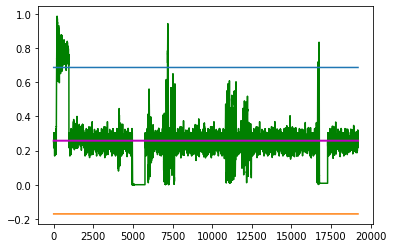

In [15]:
plt.plot(a, 'g-', markersize = 3)
plt.plot(mean*np.ones(19200), 'm-', linewidth = 2)
plt.plot((mean+3*std)*np.ones(19200))
plt.plot((mean-3*std)*np.ones(19200))

need for scaling?

In [16]:
X.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
ff = X.iloc[:1000,:3]
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

In [17]:
pd.DataFrame(data=tr_s)

,0,1,2
0,-1.848779,0.269476,-0.302861
1,-1.845912,-0.580703,1.204673
2,-1.863842,-0.555366,0.303686
3,-1.849598,-0.972010,0.477405
4,-2.003870,-0.197841,1.238534
...,...,...,...
995,-1.717898,0.379267,0.578987
996,-2.005645,-0.597594,-0.255751
997,-1.990081,-0.608854,0.486239
998,-1.822840,-0.155614,-0.345555


In [ ]:
# copy the data
df_max_scaled = tr.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
	df_max_scaled[column] = df_max_scaled[column] / df_max_scaled[column].abs().max()
	
# view normalized data
display(df_max_scaled)


In [ ]:
hist, bins = np.histogram(fault_free['xmeas_10'], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

In [ ]:
hist, bins = np.histogram(faulty['xmeas_10'], bins=100, normed=True)
bin_centers = (bins[1:]+bins[:-1])*0.5
plt.plot(bin_centers, hist)

#PCA

how to find n_components?

In [36]:
n_components = 10 #choose the number of n-components for PCA

In [37]:
pca = PCA(n_components=n_components)

need for loading vector?

In [40]:
pca.fit(X_train)

In [39]:
pca.fit_transform(X_train)

array([[-35.9525397 , -14.11914375,  -4.96082722, ...,   0.56277458,
         -0.47091743,   1.1038965 ],
       [-43.1543175 , -35.68399717,  -0.95907186, ...,   2.23179553,
         -0.821137  ,  -1.9618147 ],
       [-13.34279705,  30.55626519,   8.81854759, ...,  -1.13374082,
          0.62163764,  -1.29926128],
       ...,
       [-35.7671483 ,  43.01006849,  -6.54668206, ...,  22.49875203,
          0.20357032,   4.60991586],
       [-53.21206456,   7.84973193, -18.98506344, ...,  24.55847881,
         -0.87233536,   2.14883194],
       [-64.66211882,  -1.85201328, -38.00218978, ...,  27.84270111,
         -1.12834818,   1.48228347]])

In [43]:
pca.explained_variance_ratio_

array([5.59626796e-01, 3.39545818e-01, 5.30855229e-02, 3.31202378e-02,
       6.48593309e-03, 2.39484957e-03, 2.06909596e-03, 1.25894288e-03,
       8.23193760e-04, 3.73138291e-04])

need Singular Values?

In [44]:
pca.singular_values_

array([13919.1194301 , 10842.05742583,  4286.97114661,  3386.17371324,
        1498.47238064,   910.54545273,   846.35551258,   660.18480275,
         533.84299133,   359.41601066])

In [45]:
pca.components_

array([[-3.39644171e-04, -7.76339382e-02, -3.53456822e-01,
         6.34359933e-04, -8.29112078e-05,  1.71180207e-04,
         4.52679065e-01, -1.83831719e-03,  1.82403831e-05,
        -2.62630993e-04, -1.09941579e-02,  2.73715029e-04,
         4.47112894e-01, -2.22113925e-06, -6.06166924e-04,
         5.01139219e-01, -1.42824560e-03,  5.45631376e-03,
         4.29237170e-01, -2.99803740e-02,  9.40037423e-04,
        -6.16773363e-03, -8.75164183e-03, -4.80760568e-04,
         1.16906696e-02, -1.32195920e-04, -3.24543226e-04,
        -3.19746482e-05, -1.29955360e-02, -6.53931994e-04,
         1.81504113e-02, -3.46698854e-05, -1.05087891e-03,
        -1.54259792e-04, -2.12652088e-03, -1.14609542e-03,
         1.02682346e-06,  2.27219253e-04,  1.57732052e-05,
         9.69807162e-04, -1.38696519e-03,  2.10250075e-03,
        -7.54200768e-03,  9.56742554e-02,  2.14432166e-02,
        -2.25740543e-02, -6.01516851e-02,  8.06201092e-04,
        -1.40280422e-03,  9.23298297e-02,  5.12601457e-0

need for find n_component from variance plot?

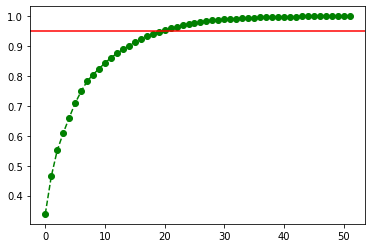

In [50]:
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X_train)
pca = PCA().fit(data_rescaled)
# fig, ax = plt.subplots()
y = np.cumsum(pca.explained_variance_ratio_)
# xi = np.arange(1,y.all(), step=1)
# f = plt.figure(figsize=(10, 10))
# plt.ylim(0.0,1.1)
plt.plot( y, marker='o', linestyle='--', color='g')
# z = 0.95z*np.ones(52)
# plt.plot(0.95*np.ones(52))
plt.axhline(y=0.95, color='r', linestyle='-')

plt.show()
# f.savefig('component_PCA.pdf')

how to detect faults?

#ICA

how to find n_components?

In [58]:
n_components = 15 #choose the number of n-components for ICA

In [59]:
transformer = FastICA(n_components=n_components,random_state=0)

In [60]:
X_transformed = transformer.fit_transform(x)

In [61]:
X_transformed

array([[-6.17019517e-03,  2.24575125e-03, -1.45842281e-03, ...,
         2.95545892e-03, -5.18036736e-03,  5.37501632e-04],
       [ 8.29817480e-03, -1.55169072e-04, -1.09021338e-03, ...,
         8.84481510e-04, -3.54191957e-03, -3.33986138e-04],
       [ 2.82440755e-03,  9.40765694e-05, -8.66225917e-04, ...,
        -3.06351810e-03,  1.43638265e-03,  1.62255985e-03],
       ...,
       [ 1.25371294e-02,  7.01022698e-04, -2.60645881e-03, ...,
        -2.60168282e-03,  1.65569118e-03,  2.12479955e-03],
       [-8.98346154e-03, -2.35233272e-04, -1.77511982e-03, ...,
        -3.47547028e-03,  1.59743006e-03,  5.11670475e-04],
       [ 3.21394784e-03,  1.55778361e-05, -2.43131587e-03, ...,
        -1.83923911e-03, -9.41830837e-05,  1.30970722e-03]])

how to detect faults?

#PLS

Create Matrix X

In [ ]:
X = 

Create Matrix Y

In [ ]:
Y  = 

In [51]:
n_components =20 #choose the number of n-components for PLS

In [52]:
pls2 = PLSRegression(n_components=n_components)

In [53]:
pls2.fit(X_train_scaled, y_train)

PLSRegression(n_components=20)

 how to select the fault type from Y_pred? 
 
 overstimate or understimate ? 
 
 how to prevent?

In [57]:
Y_pred = pls2.predict(X_test_scaled)

In [58]:
Y_pred

array([[12.24642616],
       [11.67360407],
       [11.54678801],
       ...,
       [13.22421755],
       [13.13437348],
       [12.1043322 ]])

#FDA

In [60]:
clf = LinearDiscriminantAnalysis()

In [63]:
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
clf.predict(X_test)

array([11, 14, 11, ..., 20, 20, 20])

how to detect faults?

#Tutorial

##Scikit-Learn Library

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[ICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

[PLS](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html)

[FDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

## Theory

Related class powerpoints